In [315]:
# Module
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats # 확률분포 그래프
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor # GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

In [316]:
# 데이터 불러오기
train = pd.read_csv('./temp_machine_learning.csv')
train.head() 

,경기날짜,팀,승패,점수차,랭킹,salary
0,01.02. 23:00,일본,0,-2,3,6934420
1,29.01. 23:00,카타르,2,4,13,147021
2,28.01. 23:00,이란,0,-3,1,4530110
3,26.01. 01:00,아랍에미리트,2,1,8,606217
4,25.01. 22:00,대한민국,0,-1,4,6038313


In [317]:
# 랭킹 데이터 변경 - 클수록 유리한 값으로 변경
train['랭킹'] = 24 - train['랭킹']
train.head()

,경기날짜,팀,승패,점수차,랭킹,salary
0,01.02. 23:00,일본,0,-2,21,6934420
1,29.01. 23:00,카타르,2,4,11,147021
2,28.01. 23:00,이란,0,-3,23,4530110
3,26.01. 01:00,아랍에미리트,2,1,16,606217
4,25.01. 22:00,대한민국,0,-1,20,6038313


In [318]:
# 랭킹 데이터와 salary 데이터 표준화 시켜서 점수 내보기
train['랭킹'] = np.log1p(train['랭킹'])
train['salary'] = np.log1p(train['salary'])
train.head()

,경기날짜,팀,승패,점수차,랭킹,salary
0,01.02. 23:00,일본,0,-2,3.091042,15.752008
1,29.01. 23:00,카타르,2,4,2.484907,11.898338
2,28.01. 23:00,이란,0,-3,3.178054,15.326257
3,26.01. 01:00,아랍에미리트,2,1,2.833213,13.314995
4,25.01. 22:00,대한민국,0,-1,3.044522,15.613635


In [319]:
# 점수 내기
train['팀점수'] = train['승패'] + train['점수차'] + train['랭킹'] + train['salary']
train.head()

,경기날짜,팀,승패,점수차,랭킹,salary,팀점수
0,01.02. 23:00,일본,0,-2,3.091042,15.752008,16.843051
1,29.01. 23:00,카타르,2,4,2.484907,11.898338,20.383244
2,28.01. 23:00,이란,0,-3,3.178054,15.326257,15.504311
3,26.01. 01:00,아랍에미리트,2,1,2.833213,13.314995,19.148208
4,25.01. 22:00,대한민국,0,-1,3.044522,15.613635,17.658158


In [320]:
len(train)

102

In [321]:
train = train.sort_values(by='팀점수')

In [322]:
train = train[[ '경기날짜', '팀', '승패', '점수차', '랭킹', 'salary', '팀점수']]
train.tail()

,경기날짜,팀,승패,점수차,랭킹,salary,팀점수
36,16.01. 22:30,대한민국,2,2,3.044522,15.613635,22.658158
86,11.01. 20:00,호주,2,3,3.135494,14.812480,22.947974
20,25.01. 01:00,이란,2,3,3.178054,15.326257,23.504311
17,28.01. 23:00,일본,2,3,3.091042,15.752008,23.843051
59,08.01. 01:00,이란,2,5,3.178054,15.326257,25.504311


In [323]:
# 인덱스 다시 설정
train.reset_index(inplace=True)
train

,index,경기날짜,팀,승패,점수차,랭킹,salary,팀점수
0,95,08.01. 01:00,예멘,0,-5,0.693147,7.454141,3.147288
1,46,12.01. 22:30,예멘,0,-3,0.693147,7.454141,5.147288
2,42,14.01. 01:00,투르크메니스탄,0,-4,1.098612,8.328934,5.427546
3,70,17.01. 01:00,예멘,0,-2,0.693147,7.454141,6.147288
4,49,11.01. 22:30,필리핀,0,-3,1.609438,8.484877,7.094315
5,50,11.01. 20:00,팔레스타인,0,-3,2.197225,7.968320,7.165544
6,47,12.01. 20:00,베트남,0,-2,2.079442,7.089243,7.168685
7,68,17.01. 22:30,투르크메니스탄,0,-2,1.098612,8.328934,7.427546
8,51,11.01. 01:00,인도,0,-2,2.302585,7.636752,7.939337
9,73,16.01. 22:30,필리핀,0,-2,1.609438,8.484877,8.094315


# train Test 나누기

In [324]:
train = train[['경기날짜', '팀', '승패', '점수차', '랭킹', 'salary', '팀점수']]

In [325]:
# train test 나누기 
train_A = train.loc[range(0,101,2),:] 

In [326]:
# train test 나누기
test_A = train.loc[range(1,100,2),:] # test

In [327]:
# categorical_feature_name = \
# ['팀','승패','점수차','랭킹']

# for i in categorical_feature_name:
#     train_A[i] = train_A[i].astype('category')

In [328]:
# categorical_feature_name = \
# ['팀','승패','점수차','랭킹']

# for i in categorical_feature_name:
#     test_A[i] = test_A[i].astype('category')

In [329]:
train_A.head()

,경기날짜,팀,승패,점수차,랭킹,salary,팀점수
0,08.01. 01:00,예멘,0,-5,0.693147,7.454141,3.147288
2,14.01. 01:00,투르크메니스탄,0,-4,1.098612,8.328934,5.427546
4,11.01. 22:30,필리핀,0,-3,1.609438,8.484877,7.094315
6,12.01. 20:00,베트남,0,-2,2.079442,7.089243,7.168685
8,11.01. 01:00,인도,0,-2,2.302585,7.636752,7.939337


In [330]:
test_A.head()

,경기날짜,팀,승패,점수차,랭킹,salary,팀점수
1,12.01. 22:30,예멘,0,-3,0.693147,7.454141,5.147288
3,17.01. 01:00,예멘,0,-2,0.693147,7.454141,6.147288
5,11.01. 20:00,팔레스타인,0,-3,2.197225,7.968320,7.165544
7,17.01. 22:30,투르크메니스탄,0,-2,1.098612,8.328934,7.427546
9,16.01. 22:30,필리핀,0,-2,1.609438,8.484877,8.094315


In [331]:
# 필요한 Feature 구성
feature_name = \
['승패','점수차','랭킹','salary']

In [332]:
X_train = train_A[feature_name]
print(X_train.shape)
X_train.tail()

(51, 4)


,승패,점수차,랭킹,salary
92,2,4,2.397895,13.730934
94,2,2,3.178054,15.326257
96,2,4,2.995732,13.584929
98,2,3,3.135494,14.812480
100,2,3,3.091042,15.752008


In [333]:
Y_train = train_A['팀점수']
print(Y_train.shape)
Y_train.tail()

(51,)


92     22.128829
94     22.504311
96     22.580662
98     22.947974
100    23.843051
Name: 팀점수, dtype: float64

In [334]:
X_test = test_A[feature_name]
print(X_test.shape)
X_test.head()

(50, 4)


,승패,점수차,랭킹,salary
1,0,-3,0.693147,7.454141
3,0,-2,0.693147,7.454141
5,0,-3,2.197225,7.968320
7,0,-2,1.098612,8.328934
9,0,-2,1.609438,8.484877


In [335]:
Y_test = test_A['팀점수']
print(Y_train.shape)
Y_test.tail()

(51,)


91    21.843051
93    22.383244
95    22.504311
97    22.658158
99    23.504311
Name: 팀점수, dtype: float64

In [336]:
# RMSLE
from sklearn.metrics import make_scorer
def rmsle(predicted_values, actual_values):
    # Numpy로 배열 형태로 변경
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 에측값과 실제값에 1을 더하고 log를 씌운다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계싼된 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    # 평균을 구한다
    mean_difference = difference.mean()
    
    # 루트를 씌운다
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [337]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0) # 고정된 상태로 10번 섞어서 테스트해라

In [338]:
model = GradientBoostingRegressor(n_estimators=1000, alpha=0.1, random_state = 0) # 1000개부터 10프로씩 줄이면서 진행
model

GradientBoostingRegressor(alpha=0.1, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [339]:
# Training
model.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.1, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [340]:
%time score = cross_val_score(model, X_train, Y_train, cv = k_fold, scoring = rmsle_scorer)
score = score.mean()
print("Score = ", score)

Wall time: 2.08 s
Score =  0.0689526960908127


In [341]:
# 예측
pre = model.predict(X_test)
print(pre.shape)
pre

(50,)


array([ 5.35142378,  6.03198843,  7.48117915,  7.70680253,  7.82427667,
        8.16868875,  8.87785241,  9.0696588 ,  9.19492532,  9.22428091,
       10.0967702 , 10.67203417, 11.16550251, 11.49565795, 12.96090286,
       12.57237158, 13.4613448 , 13.4412953 , 14.33821166, 14.10013916,
       14.27674157, 13.8776038 , 15.12901826, 15.64745736, 15.62289607,
       16.55414119, 16.24846556, 16.62933121, 16.94807233, 17.14727403,
       17.38377505, 17.09228773, 18.85141114, 18.38303648, 18.21887882,
       18.58458086, 20.69713026, 19.14974818, 19.40308935, 19.15075398,
       20.49431485, 20.94781289, 21.65814422, 21.84298012, 21.84298012,
       21.84298012, 19.15075398, 22.50414843, 22.55355901, 23.7344857 ])

In [342]:
Y_test

1      5.147288
3      6.147288
5      7.165544
7      7.427546
9      8.094315
11     8.168685
13     8.939337
15     9.069171
17     9.096501
19     9.224496
21    10.096501
23    10.238566
25    11.165544
27    11.682461
29    12.168685
31    12.585110
33    13.069171
35    13.421758
37    13.908616
39    14.100351
41    14.238566
43    14.939337
45    15.128829
47    15.218127
49    15.504311
51    15.908616
53    16.224496
55    16.843051
57    16.947974
59    17.148208
61    17.383244
63    17.658158
65    18.218127
67    18.383244
69    18.421758
71    18.585110
73    19.128829
75    19.148208
77    19.908616
79    20.383244
81    20.585110
83    20.947974
85    21.658158
87    21.843051
89    21.843051
91    21.843051
93    22.383244
95    22.504311
97    22.658158
99    23.504311
Name: 팀점수, dtype: float64

## pre 값을 원위치 시켜야한다.??

In [313]:
pre

array([ 5.35142378,  6.03198843,  7.48117915,  7.70680253,  7.82427667,
        8.16868875,  8.87785241,  9.0696588 ,  9.19492532,  9.22428091,
       10.0967702 , 10.67203417, 11.16550251, 11.49565795, 12.96090286,
       12.57237158, 13.4613448 , 13.4412953 , 14.33821166, 14.10013916,
       14.27674157, 13.8776038 , 15.12901826, 15.64745736, 15.62289607,
       16.55414119, 16.24846556, 16.62933121, 16.94807233, 17.14727403,
       17.38377505, 17.09228773, 18.85141114, 18.38303648, 18.21887882,
       18.58458086, 20.69713026, 19.14974818, 19.40308935, 19.15075398,
       20.49431485, 20.94781289, 21.65814422, 21.84298012, 21.84298012,
       21.84298012, 19.15075398, 22.50414843, 22.55355901, 23.7344857 ])

In [344]:
# pre = np.exp(pre)
# pre

[Text(0.5, 1.0, 'Test')]

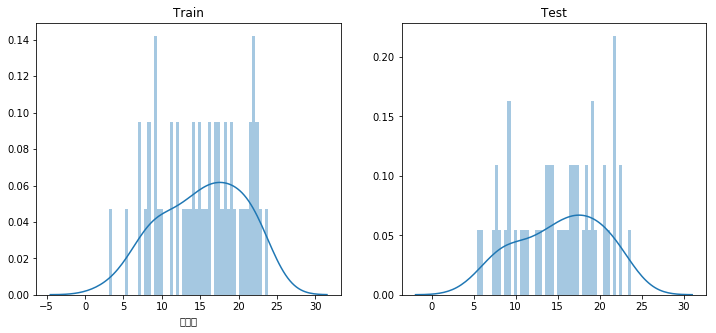

In [314]:
# 예측한 데이터를 시각화
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)
sns.distplot(Y_train, ax = ax1, bins=50) # 50개정도로 나눔
ax1.set(title = 'Train')
sns.distplot(pre, ax = ax2, bins = 50)
ax2.set(title = 'Test')

## 두 그래프의 차이가 심하면 적용모델이 틀린 것이다.

In [343]:
pre

array([ 5.35142378,  6.03198843,  7.48117915,  7.70680253,  7.82427667,
        8.16868875,  8.87785241,  9.0696588 ,  9.19492532,  9.22428091,
       10.0967702 , 10.67203417, 11.16550251, 11.49565795, 12.96090286,
       12.57237158, 13.4613448 , 13.4412953 , 14.33821166, 14.10013916,
       14.27674157, 13.8776038 , 15.12901826, 15.64745736, 15.62289607,
       16.55414119, 16.24846556, 16.62933121, 16.94807233, 17.14727403,
       17.38377505, 17.09228773, 18.85141114, 18.38303648, 18.21887882,
       18.58458086, 20.69713026, 19.14974818, 19.40308935, 19.15075398,
       20.49431485, 20.94781289, 21.65814422, 21.84298012, 21.84298012,
       21.84298012, 19.15075398, 22.50414843, 22.55355901, 23.7344857 ])

# 적용해본 방식 정리하기